### importライブラリ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 二次元配列と勾配問題

機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。


この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

## 【問題1】1次配列
$ x $が-50から50の範囲で次の式を考えます。  
$$
y = \frac{1}{2}x + 1
$$ 

-50から50まで0.1間隔の$x$を表すndarrayと、各要素に対する$y$を表すndarrayを作成してください。

### 【問題1】解答

In [35]:
x = np.arange(-50, 50.1, 0.1)
y = 0.5*x + 1
x

array([-50. , -49.9, -49.8, ...,  49.8,  49.9,  50. ])

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

### 【問題2】解答

In [29]:
array = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))

## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

![](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)


各変化量は以下の図のように隣同士の要素の差から近似的に求めます。


![](https://t.gyazo.com/teams/diveintocode/398d8c5b4b1bd4151dea6488059226a1.png)


**《注意》**


* 厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
* 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

### 【問題3】解答

In [4]:
d_x = x[1:] - x[:-1]
d_y = y[1:] - y[:-1]

In [33]:
grad = d_y / d_x
grad.shape

(1000,)

## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

### 【問題4】解答

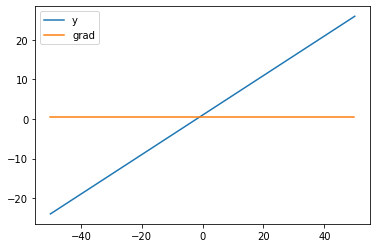

In [6]:
plt.plot(x, y, label='y')
plt.plot(x[:-1], grad, label='grad')
plt.legend();

## 【問題5】pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。  
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。
$$
y = x^{2} \quad (-50\leq x \leq 50)\\
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$
また、問題4と同様にグラフを描いてください。  
ndarrayに対して三角関数のsinの計算を行うには `np.sin()`を用います。

### 【問題5】解答

In [7]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    x = np.arange(*x_range)
    y = function(x)
    array_xy = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))
    gradient = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    return array_xy, gradient

In [8]:
def function1(array_x):
    array_y = array_x**2
    return array_y

def function2(array_x):
    array_y = 2 * array_x**2 + 2**array_x
    return array_y

def function3(array_x):
    array_y = np.sin(array_x**0.5)
    return array_y

In [34]:
array_xy_1, grad_1 = compute_gradient(function1, x_range=(-50, 50.1, 0.1))
array_xy_2, grad_2 = compute_gradient(function2, x_range=(-50, 50.1, 0.1))
array_xy_3, grad_3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))

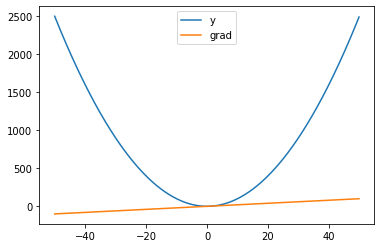

In [10]:
plt.plot(array_xy_1[:-1,0], array_xy_1[:-1,1], label='y')
plt.plot(array_xy_1[:-1,0], grad_1, label='grad')
plt.legend();

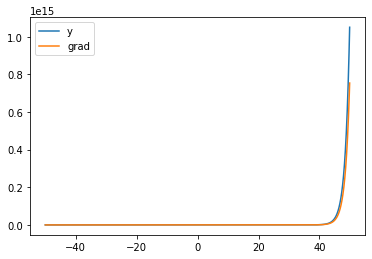

In [11]:
plt.plot(array_xy_2[:-1,0], array_xy_2[:-1,1], label='y')
plt.plot(array_xy_2[:-1,0], grad_2, label='grad')
plt.legend();

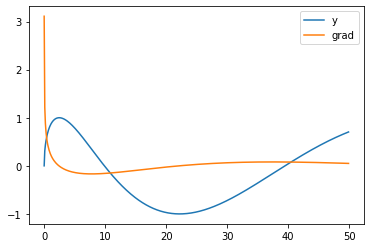

In [12]:
plt.plot(array_xy_3[:-1,0], array_xy_3[:-1,1], label='y')
plt.plot(array_xy_3[:-1,0], grad_3, label='grad')
plt.legend();

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。  

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。  
minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。  

また、最小のyをとる前後の勾配を表示してください。

### 【問題6】解答

In [13]:
minimum_1 = np.min(array_xy_1[:,1])
argminimum_1 = np.argmin(array_xy_1[:,1])
minimum_1, argminimum_1

(5.048709793414476e-25, 500)

In [14]:
print(grad_1[499:502])

[-0.1  0.1  0.3]


In [15]:
minimum_2 = np.min(array_xy_2[:,1])
argminimum_2 = np.argmin(array_xy_2[:,1])
minimum_2, argminimum_2

(0.9505505632959851, 498)

In [16]:
print(grad_2[497:500])

[-0.41701833  0.02482428  0.46967008]


In [17]:
minimum_3 = np.min(array_xy_3[:,1])
argminimum_3 = np.argmin(array_xy_3[:,1])
minimum_3, argminimum_3

(-0.9999997540298113, 222)

In [18]:
print(grad_3[221:224])

[-0.00063884  0.00048745  0.00160612]
